# Исследование и анализ данных по продаже компьютерных игр

**Исходные данные:** 

исторические данные из открытых источников  о продажах игр, с оценками пользователей и экспертов, жанрами и платформами (например, Xbox или PlayStation).

**Цель:**

выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Этапы исследования:**


1.   Загрузка исходных данных и их общая оценка, построение гистрограмм для каждого столбца с числовыми значениями.


2.   Подготовка данных для последующей работы:

    *   обработка пропусков: поиск, изучение, заполнении или удаление, где это возможно или обоснованное игнорирование этих значений;
  *   работа с типами данных: поиск столбцов с несоответствующими типами и последующая замена;
  *   обработка дубликатов;
  *   обработка аномальных значений: поиск и восстановление данных, где это возможно, или удаление, для устранения искажения данных.

  
3.   Добавление новых столбцов: 

  *   суммарные продажи во всех регионах.  

  
4.   Проведение исследовательского анализа данных:
  * изучение количества игры по годам, оценка значимости периодов;
  * изучение распределения продаж в зависимости от платформы, построение графиков распределения по годам для платформы с наибольшими суммарными продажами, определение срока появления/исчезновения старых платфом;
  
  Нижеприведенные задачи применяются для исследования актуального периода, который определяется на основе предыдущего анализа. Основной фактор определения — эти данные помогут построить прогноз на 2017 год.

  * оценка потенциально прибыльных платформ;
  * построение диаграммы размаха по глобальным продажам игр в разбивке по платформам;
  * анализ влияния отзывов пользователей, критиков на продажи внутри одной популярной платформы, построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами, соотнесение выводов относительно других платформ;
  * оценка общего распределение игр по жанрам и продаж по ним.

  
5. Составление портрета пользователя каждого региона:
Определите для пользователя каждого региона (NA, EU, JP):
  * определение самых популярные платформы (топ-5) и анализ различия в долях продаж;
  * определение и анализ самых популярных жанров (топ-5); 
  * определение влияния рейтинга ESRB на продажи в отдельном регионе.

6. Проверка гипотез:
  * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * средние пользовательские рейтинги жанров Action и Sports разные.
7. Заключение, подведение итогов работы.


## 1 Загрузка исходных данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [ ]:
def decor(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios": (.25, .90)},
                                    figsize=(10, 8))
  sns.set_style("whitegrid")
  sns.boxplot(data=col[(col.notna())], ax=ax_box, orient="h")
  sns.histplot(data=col[(col.notna())], ax=ax_hist)
  plt.yscale("log")
  plt.show()

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  games = pd.read_csv("/content/drive/MyDrive/Yandex/games.csv")
except:
  games = pd.read_csv("/datasets/games.csv")

Mounted at /content/drive


In [ ]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация по датасету

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия столбцов не очень удобны в использовании, присутствуют пропущенные значения, некоторые типы значений не соответствуют содержанию столбцов. Для построения гистограмм изменим типы данных в столбцах `year_of_release` и `user_score`, а так же переименуем все столбцы.

In [ ]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 
                 'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 
                 'user_score', 'rating']
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
games.user_score.replace(to_replace="tbd", value=None, inplace=True)
games = games.astype(dtype={
    "year_of_release": "Int16",
    "user_score": float
})

Значение "tbd" в столбце пользовательских оценок означает, что оценка будет определена позднее, предположительно, после опроса досаточного количества респондентов. Соответсвенно, рейтинга нет. Поэтому заменили значение пропусками. 

In [ ]:
games.dtypes

name                object
platform            object
year_of_release      Int16
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

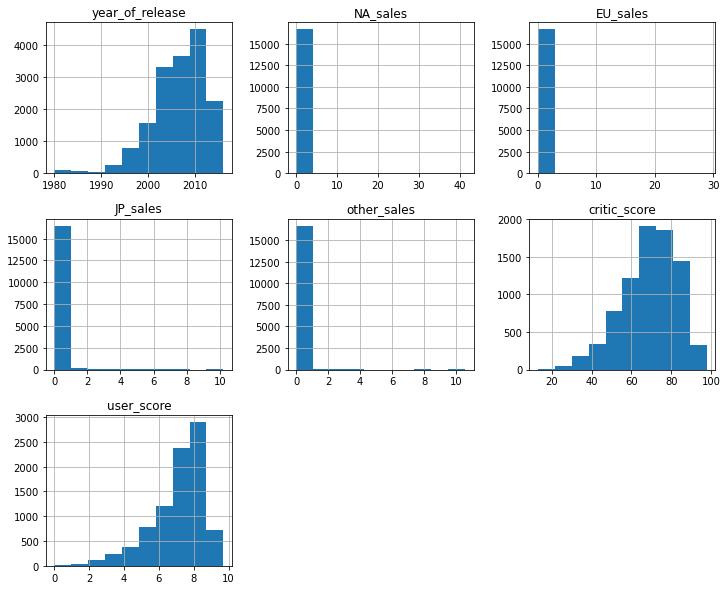

In [ ]:
games.hist(figsize=(12, 10), layout=(3, 3))

plt.show()


1.   Данные определены для 1980 - 2016 гг релиза. 
2.   В столбца продаж преобладают нулевые значения.
3.   Графики распределения оценок имеют смещение вправо

Поверим наблюдения с помощью статической информации о датасете

In [ ]:
games.describe(include="all")

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,8760.000000,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,NaN,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,7.099749,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,1.520065,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,NaN


Статистическое описание данных подтвердило наблюдения. Здесь же мы можем видеть хаактеристики для категориальных столбцов, что погоает нам в общем оценить количество уникальных значений, самые частые значения и их частоту. Наиболее богата на релизы игра `Need for Speed: Most Wanted`, она встречается в датасете 10 раз, а самая популярная платформа - `PS2` с частотой 2127. Популярный жанр - `Action` (3307), рейтинг - `E` (3919). Оценим количество пропущенных значений по столбцам

In [ ]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         7955
rating             6766
dtype: int64

In [ ]:
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,48.000000


Наибольшее количество пропусков в столбцах оценок и рейтинга, меньше всего (2%) в столбце года релиза. Оценим количество явных дубликатов 

In [ ]:
games.duplicated().sum()

0

Посмотрим корреляцию между столбцами. 

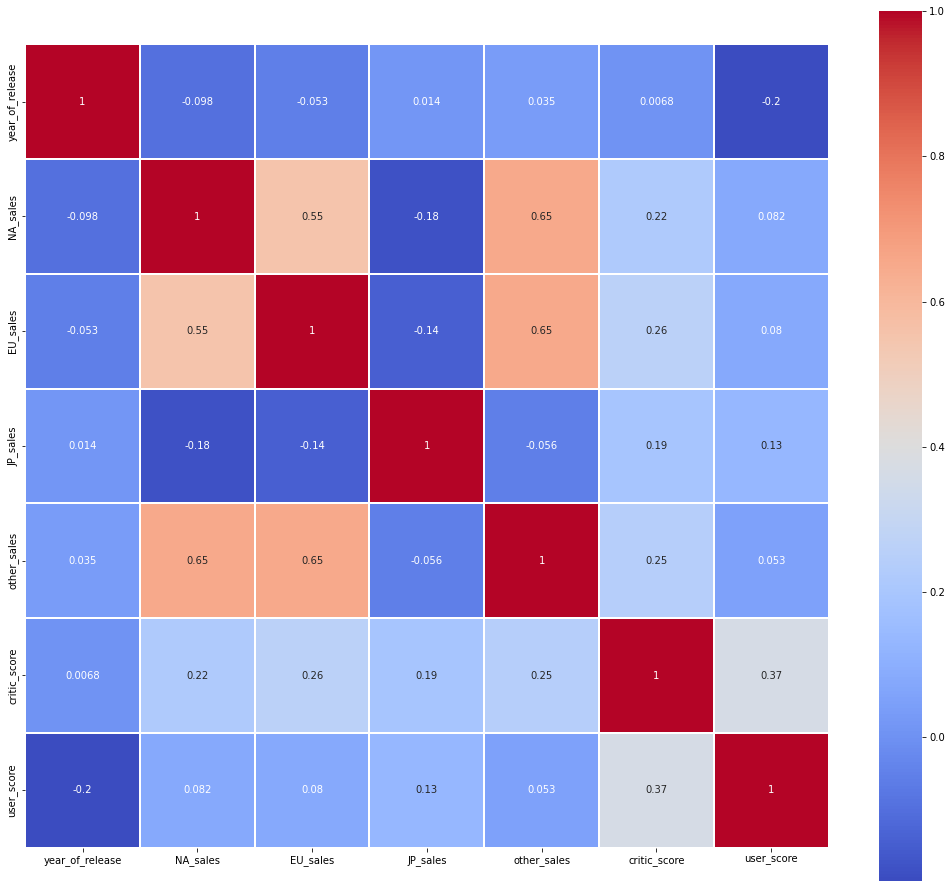

In [ ]:
games_corr=games.corr(method="kendall")
plt.figure(figsize=(18,16))
sns.heatmap(games.corr(method="kendall"), annot=True, linewidths=0.3, cmap='coolwarm', square=True)
plt.show()

Пределы корреляции [-1, 1]. Чем ближе к корреляция к пределам, тем выше зависимость. На основе этого, может сделать вывод - столбцы продаж коррелируют между собой. Столбец JP_sales менее всего участвует в корреляции (коэфф. корреляции -0.18, -0.14, -0.056), предположительно, по причине малого количества значимых строк. Корреляция между ними наблюдается потому что столбцы представляют единую величину - продажи, представленную для разных регионов. Столбцы оценок пользователей и критиков довольно близки, судя по корреляции, но зависимость между ними слабая. Зависимось между годом релиза/продажами в Японии и пользовательскими оценками так же довольно слабая.

## 2 Подготовка данных

Проведем анализ данных по столбцам

### name

In [ ]:
games[games.name.isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Столбец с названиями игр, типа object. Пропущенные значения присутствуют, похоже на ошибку при выгрузке данных, восстановить не представляется возможным. Необходимо оценить количество неявных дубликатов

In [ ]:
games.drop(games[games.name.isna()].index, inplace=True)
games.name.isna().sum()

0

In [ ]:
games.name.nunique()

11559

Количество уникальных названий велико. Попробуем сгруппировать данные по плтаформе и поискать одинаковые названия в каждой группе. Если таковые найдутся - удалим их. Игры с одинаковым названием на одной и той же платформе не встречаются. 

In [ ]:
name_copy = games.iloc[:, :4].copy()
name_copy.name = name_copy.name.str.lower()

In [ ]:
group = name_copy.groupby("platform")
keys = group.groups.keys()
for i in keys:
  if group.get_group(i).duplicated(subset="name").sum() > 0:
    dupl = (group.get_group(i)
          .loc[group.get_group(i)
          .sort_values(by=["year_of_release"])
          .duplicated(subset="name", keep="first")])
    games.drop(dupl.index, inplace=True)
    print(dupl)


                              name platform  year_of_release   genre
11715  need for speed: most wanted       PC             2012  Racing
                    name platform  year_of_release     genre
604        madden nfl 13      PS3             2012    Sports
4127  sonic the hedgehog      PS3             <NA>  Platform
                             name platform  year_of_release   genre
1190  need for speed: most wanted     X360             2012  Racing


In [ ]:
games.reset_index(inplace=True, drop=True)

Дубликатов оказалось не так много, а для игры `need for speed: most wanted`, благодаря поиску дубликатов, удалили неверное значение, потому что эта игра вышла в 2005 году.

### platform

Text(0.5, 0, 'Count')

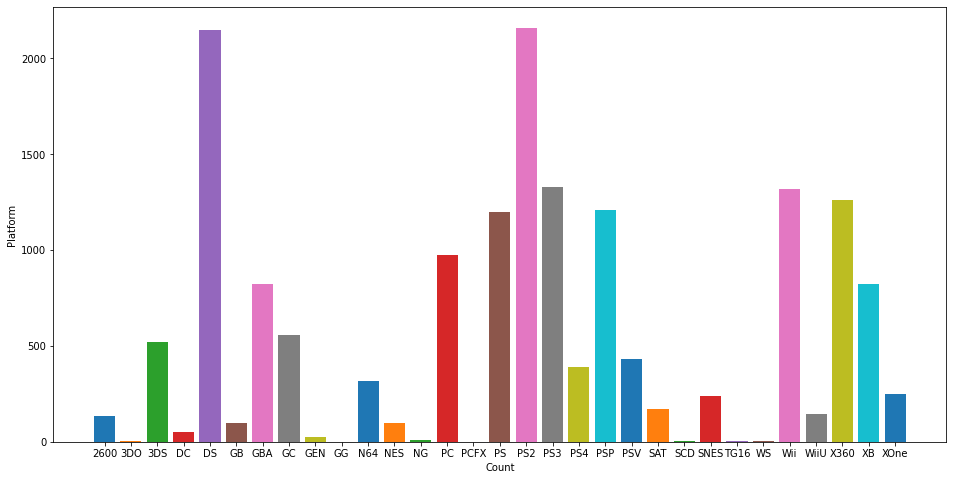

In [ ]:
plt.figure(figsize=(16, 8))
for k in keys:
  plt.bar(k, group.get_group(k).count())
plt.ylabel("Platform")
plt.xlabel("Count")

Пропущенных значений нет, тип данных соответствует содержимому. Из графика выше можно видеть, что преобладают игры для Nintendo (DS) и PS2

### year_of_release

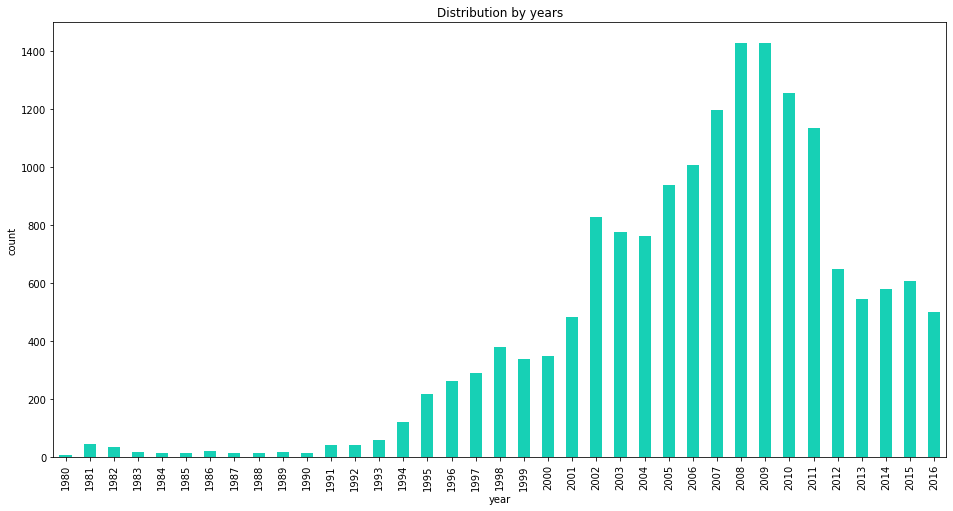

In [ ]:
plt.figure(figsize=(16, 8))
games.year_of_release.value_counts().sort_index().plot.bar(color="#17d0b5")
plt.ylabel("count")
plt.xlabel("year")
plt.title("Distribution by years")
plt.show()

В столбце присутствуют пропущенные значения, тип данных уже изменен. Ожидаемо, что 1980 г занимает последнюю позицию по количеству выпущенных игр в соответствии со слабой развитостью игровой индустрии в целом. Далее игровая индустрия планомерно развивалась вплоть до финансового кризиса 2008. В 2009, по заключенным контрактам игры еще выпускались, а после - резкий спад. Оценим строки с пропущенными значениями

In [ ]:
games[games.year_of_release.isna()].head(10)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
608,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
626,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
656,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,9.0,E
676,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
717,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
803,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Заполнить значения не представляется возможным. Так как они представляют незначительную часть датасета (< 2%), то их можно удалить.

In [ ]:
games = games.dropna(subset=["year_of_release"])
games.year_of_release.isna().sum()

0

### genre

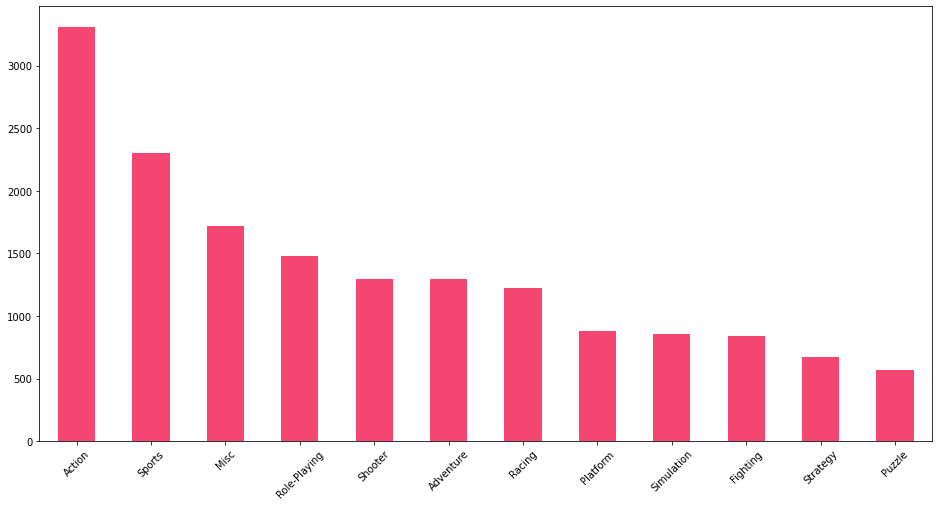

In [ ]:
plt.figure(figsize=(16, 8))
games.genre.value_counts().plot.bar(rot=45, color="#f54671")
plt.show()

Присутствуют пропущенные значения в количестве 2-х строк, которые можно удалить. Тип данных соответствует содержимому. Преобладающий жанр - action, наименее популярный - puzzle. Игры - как способ абстрагировать от реальности, action-жанр предполагает быстроту действий и реакции, не предполагая вдумчивости и размышлений, в отличии от puzzle, что объяснеет популярность одного и ее отсутствии у другого.

In [ ]:
games = games.dropna(subset=["genre"])
games.reset_index(inplace=True, drop=True)
games.genre.isna().sum()

0

### NA_sales

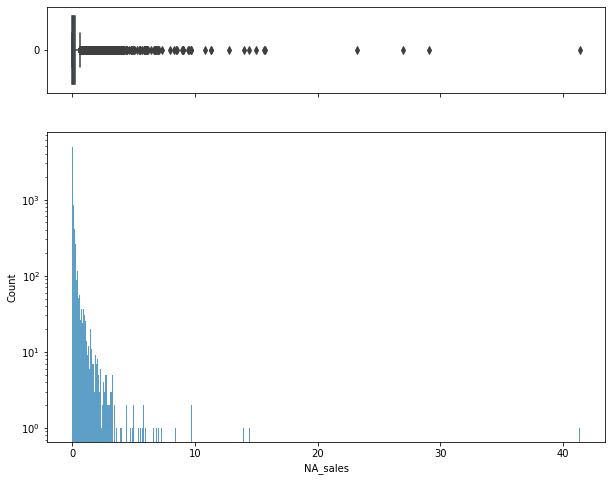

In [ ]:
decor(games["NA_sales"])

Пропущенных значений нет, тип значений соответствует содержимому. Довольно много выбросов, наиболее искажающие данные находятся после 5 млн. Рассмотрим эти строки подробнее

In [ ]:
games.query("NA_sales > 5")

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Знакомые многим игры: Duck Hunt, Mario, Pokemon и т.д. Эти игры вполне могли продаваться в таких количествах. Удаление этих строк повлияет на дальнейший анализ. Теперь проанализируем всплеск нулевых значений продаж

In [ ]:
games.query("NA_sales == 0")["NA_sales"].count()

4448

In [ ]:
print(f'{games.query("NA_sales == 0")["NA_sales"].count()/games["NA_sales"].count(): .2%}')

 27.05%


Большое количество строк содержит нулевые значения продаж для Северной Америки. Возможно, в этом регионе, продаж для этих игр не было. Доля нулевых продаж, достаточна мала ~27%, можно продолжать анализ без внесения изменений в эти строки

### EU_sales

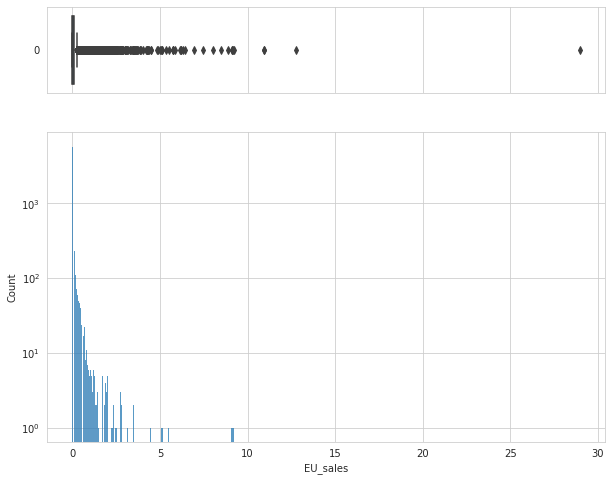

In [ ]:
decor(games["EU_sales"])

Пропущенных значений нет, тип значений соответствует содержимому. Довольно много выбросов, наиболее искажающие данные находятся после 5 млн. Скорее всего, здесь ситуация аналогична предыдущему столбцу, поэтому рассмотрим только названия игр

In [ ]:
games.query("EU_sales > 5")["name"]

0                                        Wii Sports
2                                    Mario Kart Wii
3                                 Wii Sports Resort
4                          Pokemon Red/Pokemon Blue
6                             New Super Mario Bros.
7                                          Wii Play
8                         New Super Mario Bros. Wii
10                                       Nintendogs
11                                    Mario Kart DS
12                      Pokemon Gold/Pokemon Silver
13                                          Wii Fit
15                                     Wii Fit Plus
16                               Grand Theft Auto V
19     Brain Age: Train Your Brain in Minutes a Day
23                               Grand Theft Auto V
24                      Grand Theft Auto: Vice City
26      Brain Age 2: More Training in Minutes a Day
28                           Gran Turismo 3: A-Spec
30          Pokémon Yellow: Special Pikachu Edition
31          

Действительно, ситуация аналогичная. Эти игры расходились многомиллионными тиражами. Теперь проанализируем всплеск нулевых значений продаж

In [ ]:
games.query("EU_sales == 0")["EU_sales"].count()

5766

In [ ]:
print(f'{games.query("EU_sales == 0")["EU_sales"].count()/games["EU_sales"].count(): .2%}')

 35.07%


Для европейского региона количество нулевых продаж выше, чем для Северной Америки. Нулевые строки составляют ~35% от общего количества, изменять строки не требуется


### JP_sales


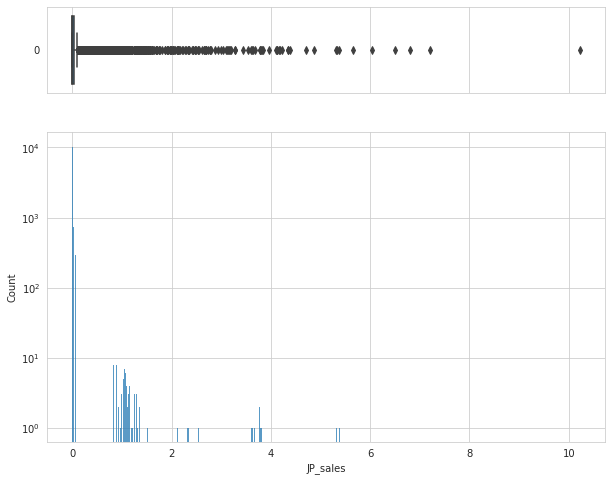

In [ ]:
decor(games["JP_sales"])

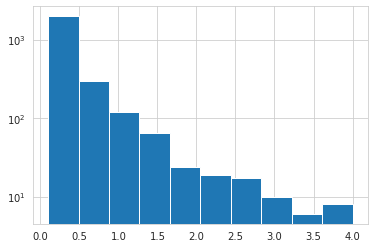

In [ ]:
games.JP_sales.hist(range=(0.1, 4))
plt.yscale("log")
plt.show()

Пропущенных значений нет, тип значений соответствует содержимому. Довольно много выбросов, наиболее искажающие данные находятся после 4 млн. Рассмотрим эти строки подробнее

In [ ]:
games.query("JP_sales > 4")["name"]

1                                   Super Mario Bros.
4                            Pokemon Red/Pokemon Blue
5                                              Tetris
6                               New Super Mario Bros.
8                           New Super Mario Bros. Wii
11                                      Mario Kart DS
12                        Pokemon Gold/Pokemon Silver
19       Brain Age: Train Your Brain in Minutes a Day
20                      Pokemon Diamond/Pokemon Pearl
21                                   Super Mario Land
25                      Pokemon Ruby/Pokemon Sapphire
26        Brain Age 2: More Training in Minutes a Day
27                        Pokemon Black/Pokemon White
33                                Pokemon X/Pokemon Y
43                        Animal Crossing: Wild World
73                          Animal Crossing: New Leaf
152    Dragon Quest IX: Sentinels of the Starry Skies
163                      Monster Hunter Freedom Unite
214                         

Аналогично предыдущим столбцам. Данные оставляем и будем иметь ввиду. Теперь проанализируем всплеск нулевых значений продаж

In [ ]:
games.query("JP_sales == 0")["JP_sales"].count()

10298

In [ ]:
print(f'{games.query("JP_sales == 0")["JP_sales"].count()/games["JP_sales"].count(): .2%}')

 62.64%


Самое большое количество строк. Возможно, эти игры не выпускали на рынок Японии ввиду его(рынка) специфичности? Нулевых строк ~63%. Здесь стоило бы обратиться к поставщику данных для разъяснения подобной ситуации. Данных для анализа ограниченное количество.

### other_sales

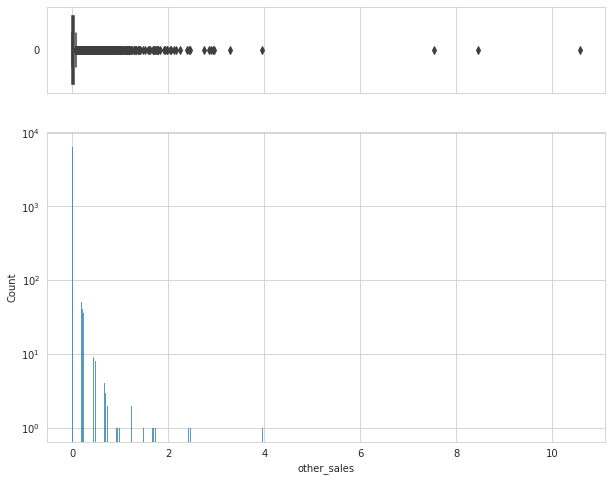

In [ ]:
decor(games["other_sales"])

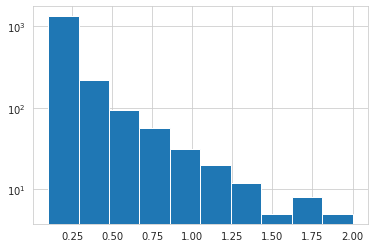

In [ ]:
games.other_sales.hist(range=(0.1, 2))
plt.yscale("log")
plt.show()

Пропущенных значений нет, тип значений соответствует содержимому. Довольно много выбросов, наиболее искажающие данные находятся после 2 млн. Рассмотрим эти строки подробнее

In [ ]:
games.query("other_sales > 2")["name"]

0                                        Wii Sports
2                                    Mario Kart Wii
3                                 Wii Sports Resort
6                             New Super Mario Bros.
7                                          Wii Play
8                         New Super Mario Bros. Wii
10                                       Nintendogs
13                                          Wii Fit
16                               Grand Theft Auto V
17                    Grand Theft Auto: San Andreas
19     Brain Age: Train Your Brain in Minutes a Day
31                        Call of Duty: Black Ops 3
34                       Call of Duty: Black Ops II
48                                   Gran Turismo 4
54                                   Gran Turismo 5
348                       Pro Evolution Soccer 2008
434                                  FIFA Soccer 08
611                  PES 2009: Pro Evolution Soccer
Name: name, dtype: object

Аналогично предыдущим столбцам. Данные оставляем и будем иметь ввиду. Теперь проанализируем всплеск нулевых значений продаж

In [ ]:
games.query("other_sales == 0")["other_sales"].count()

6492

In [ ]:
print(f'{games.query("other_sales == 0")["other_sales"].count()/games["other_sales"].count(): .2%}')

 39.49%


Здесь видим среднее значение нулевых строк среди всех столбцов продаж, но довольно большой процент от общего количества. Тем не менее данных достаточно для анализа.

### critic_score

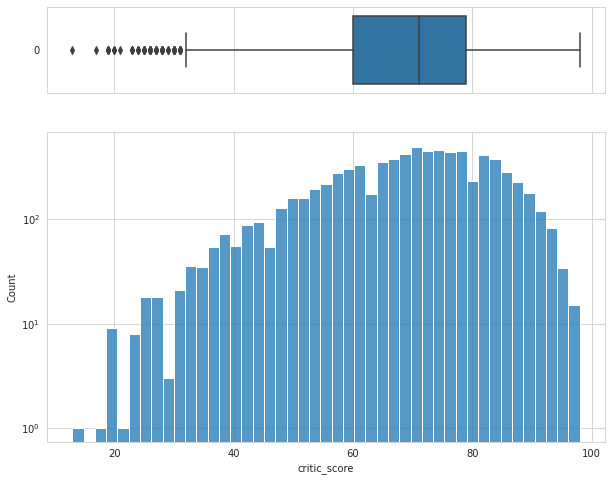

In [ ]:
decor(games.critic_score)

In [ ]:
games.critic_score.describe()

count    7980.000000
mean       68.989223
std        13.920148
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Столбец с наибольшим количеством пропущенных значений, более 50%. Данные смещенны вправо (среднее больше медианы). Выбросы присутствуют, но данных не искажают. Так как далее будет произведен исследовательский анализ данных, то заполнять пропуски средним значеним будет некорректно. Проверим это утвеждение

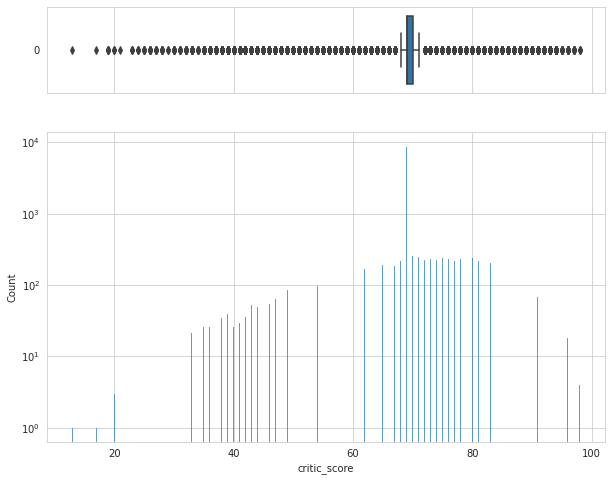

In [ ]:
score = games.critic_score.copy()
score.fillna(score.mean(), inplace=True)
decor(score)

Попытка заполнить средним значением этого же столбца искажает разброс данных. Отбросим эту идею. Так как мы наблюдали слабую корреляцию между оценками критиков и оценками пользователей, то могли бы заполнить средним по оценкам пользователей, но это так же исказит данные и последующий анализ не будет корректен

### user_score


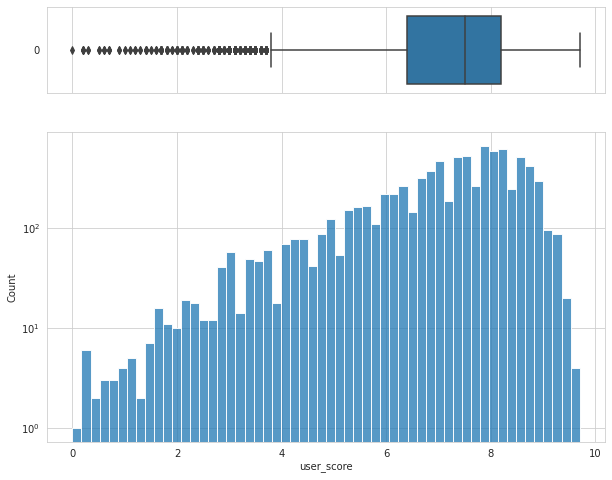

In [ ]:
decor(games.user_score)

In [ ]:
games.user_score.describe()

count    8606.000000
mean        7.099710
std         1.519695
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Присутствуют пропущенные значения. Тип данных уже был изменен. Данные смещенны влево (среднее меньше медианы). Выбросы присутствуют, но данных не искажают. Так как далее будет произведен исследовательский анализ данных, то заполнять пропуски средним значеним (по данному столбцу или столбцу `critic_score`) будет некорректно, по логике предыдущего столбца.

### rating

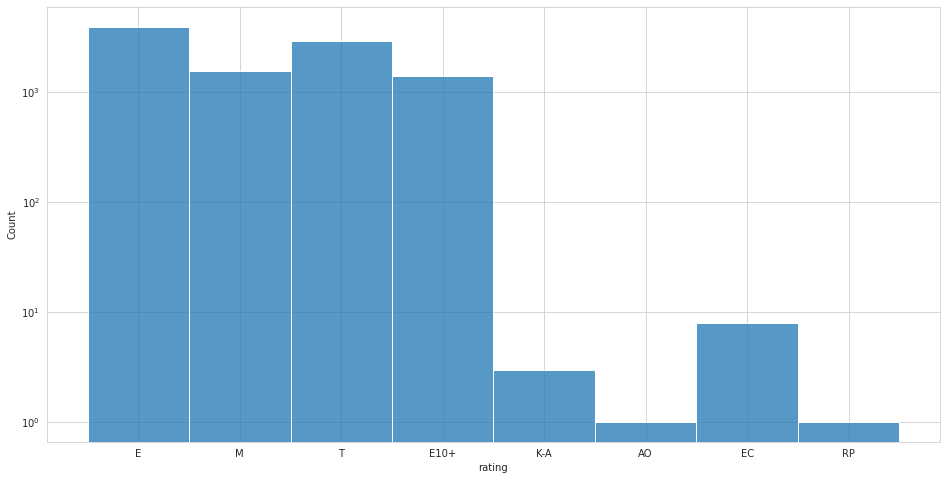

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(games.rating, stat="count")
plt.yscale("log")
plt.show()

Присутствуют пропущенные значения. Тип данных соответствует. Основные рейтинги: для всех(`E`), для подростков (`T`), для взрослых (`M`) и для всех старше 10 лет (`E10+`). Значительную часть составляют данные без рейтинга

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году. Проверим предположение, что рейтинг пропущен для игры, выпущенных до 1994, а так же объеденим рейтинги  'K-A' и 'EC', представляющие собой один и тот же рейтинг, но для разных годов. 

In [ ]:
games["rating"].replace("K-A", "EC", inplace=True)

In [ ]:
games["rating"].isna().sum()

6676

In [ ]:
games[games["year_of_release"] < 1994]["rating"].isna().sum()

361

361 попущенное значение для игр, выпущенных ранее 1994. Проверим другой предположение: так как дейстивя организации направлены на США и Канаду, то пропущенные значения - отсутствие рейтинга для других регионов

In [ ]:
games.query("NA_sales == 0")["rating"].isna().sum()

3688

Заполним пропуски 'unknown', а так же, заполним значения RP, потому что это значение говорит о том, что рейтинг ожидается

In [ ]:
games["rating"] = games["rating"].fillna("unknown")

In [ ]:
games["rating"].replace("RP", "unknown", inplace=True)

In [ ]:
games["rating"].isna().sum()

0

### Вывод

Датасет был проанализирован на наличие явных/неявных дубликатов, пропущенных значений, неверных типов данных, выбросов. Построены графики распределений. Для столбцa name удалены дубликаты и неверные значения. Для столбца `year_of_release` были удалены пропущенные значения, которые не удалось заполнить группировкой по платформе. Для столбцов с продажами по регионам (`JP_sales`, `NA_sales`, `EU_sales`, `other_sales`) были найдены и оставлены выбросы и нулевые значений. Для столбцов оценок (`critic_score`, `user_score`)так же были выявлены и оставлены незаполнеными пропущенные значения, чтобы не искажать последующий исследовательский анализ. Столбец `rating`, категориальные данные, был заполнен заглушкой "Unknown", чтобы иметь возможность без ошибок работать с этим столбцом в дальнейшем.

## 3 Добавление новых столбцов

Здесь необходимо добавить столбец суммарных продаж. Как уже упоминалось ранее, суммарные продажи состоят из 4-х столбцов продаж по регионам

In [ ]:
games["all_sales"] = games.NA_sales + games.EU_sales\
 + games.JP_sales + games.other_sales
games

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16436,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16437,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16438,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16439,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## 4 Исследовательский анализ

### Количество игр по годам

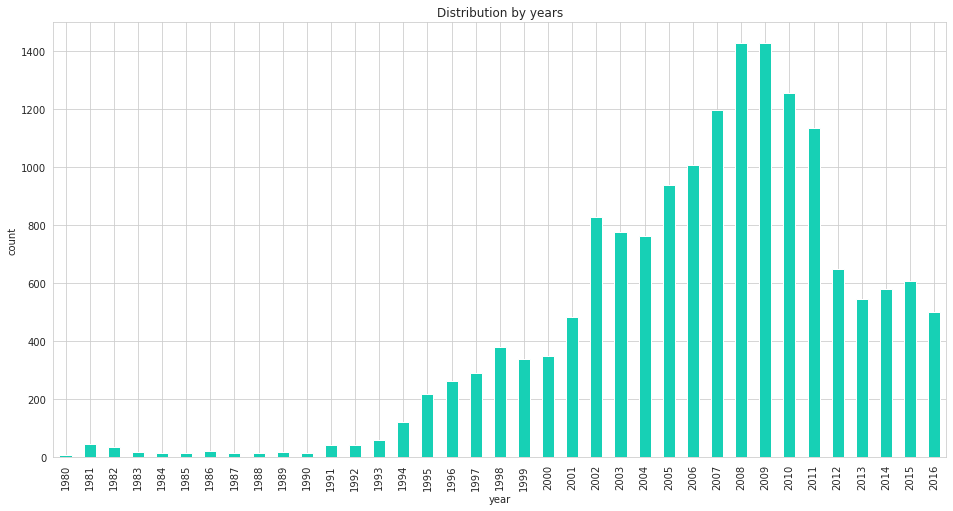

In [ ]:
plt.figure(figsize=(16, 8))
games.year_of_release.value_counts().sort_index().plot.bar(color="#17d0b5")
plt.ylabel("count")
plt.xlabel("year")
plt.title("Distribution by years")
plt.show()

Как уже говорилось в разделе подготовки данных для столбца `year_of_release`, период с 1980 по 1990 представлен малым количеством выпускаемых игр ввиду слабой технической развитости этого периода. С 1990 начинается золотой век для игровой индустрии: на рынок выходят компании, которые позже станут гигантами игровой индустрии - Activision, Electronic Arts, Blizzard. Вплоть до 2008 количество выпускаемы игр неуклонно растет с периодами стагнации - 1999 - 2000, 2003-2004. Возможно именно на эти года приходились пропущенные значения в столбце года релиза. После мирового экономического кризиса 2008 года, игровая индустрия идет на спад. Для последующего анализа возьмем период после спада, предположительно с 2011 

### Зависимость продаж от платформы

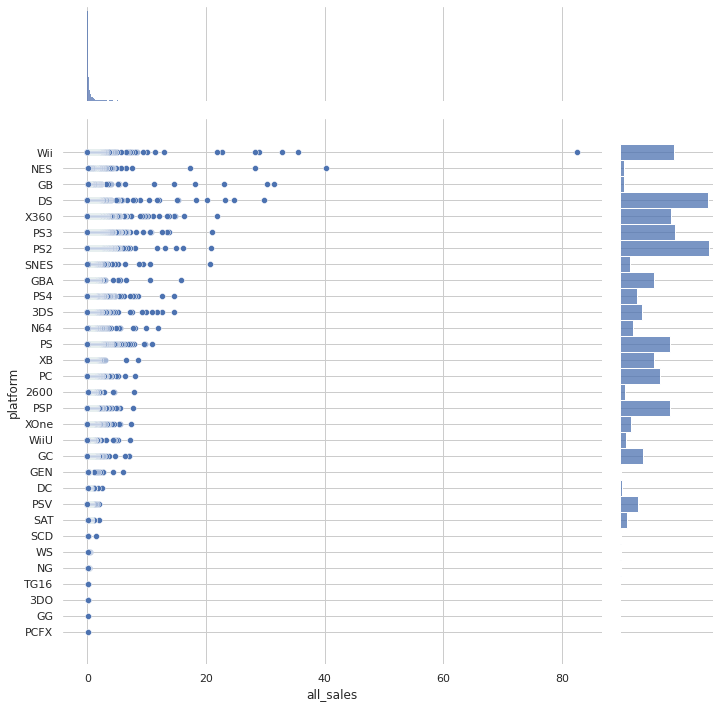

In [ ]:
sns.set_theme(style="whitegrid")
# plt.figure(figsize=(10, 15))
sns.jointplot(data=games, x="all_sales", y="platform", height=10)
plt.ylabel("")
plt.xlabel("Dependence of sales on the platform")
sns.despine(left=True, bottom=True)
plt.show()

Оценивать самые продающие платформы исключительно по распределению продаж на них было бы некорректно. Некоторые игры, имея в арсенале несколько сот игр проданных в количестве десятков миллионов копий, могут уступать по суммарным продажам платформам с тысячами игр, но с меньшим количеством проданных копий. Поэтому оценим зависимость продаж от платформы с учетом распределения суммарного количества игр.

Итак, самые "продающие" платформы: 
* Wii, единственнная платформа, которая имеет игры с продажами более 80 млн копий. По среднему количеству выпущенных игр находится на 3-м месте;
* DS, по среднему количеству выпущенных игр находится на втором месте, игры продавались до 30 млн копий;
* PS2, первое место по количеству выпущенных игр, но с продажами чуть более 20 млн. копий

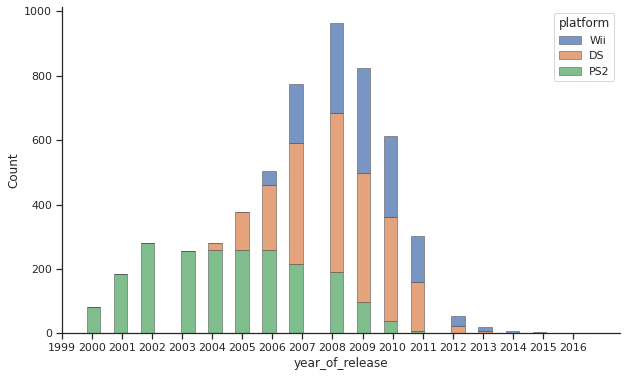

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
sns.histplot(data=games.query('platform == ["Wii", "DS", "PS2"]'),
    x="year_of_release", hue="platform", multiple="stack",
    palette="deep",
    edgecolor=".3",
    linewidth=.5, 
)
sns.despine(f)
plt.xlim(1999)
ax.set_xticks(range(1999, 2017))
plt.show()


Пик популярности PS2 пришелся на 2002, с плавным снижением вплоть до 2011, где количество выпущенных игр совсем мало. DS сумела обогнать PS2 по количеству выпущенных игр в 2008 году: 300 игр в 2002 году у PS2 против 700 в 2008 у DS. Но количество выпущенных игр так же сошло на нет к 2016. Wii приблизилась к 1000 выпущенных игр (за 2008 г.). Финал платформы аналогичен предыдущим. 

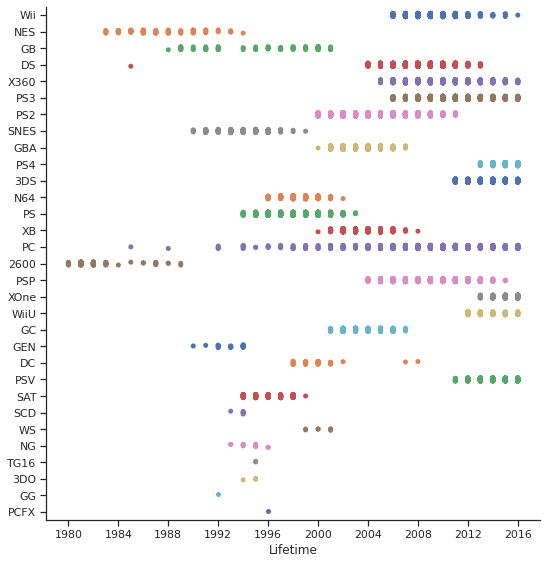

In [ ]:
f = sns.catplot(data=games, x="year_of_release", y="platform", palette ="deep", 
            height=8)
f.set(xticks=range(1980, 2018, 4))
plt.ylabel("")
plt.xlabel("Lifetime")
plt.show()

На момент 2016 года существовали не так уж и много игровых платформ, всего 9 (Wii, X360, PS3, PS4, 3DS, PC, XOne, WiiU, PSV). Были и такие платформы, что просуществовали всего один год: GG, PCFX. 

### Потенциально прибыльные платформы *

Так как здесь мы оцениваем потенциально прибыльные в следующем, 2017, году, то имеет смысл анализировать платформы, которые существуют и поддерживаются на момент 2016 года, а промежуток времени выбрать, не с 2011, как предполагалось ранее, а с 2013. Потому что срок жизни платформ, как мы видели на предыдущем графике достаточно короток. 

In [ ]:
games_new = games[games.year_of_release > 2013]

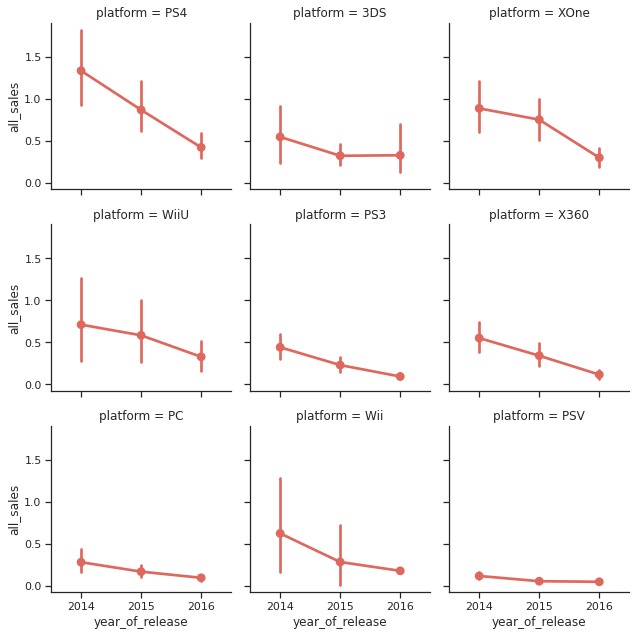

In [ ]:
grid = sns.FacetGrid(games_new.query('platform != ["PSP","DS"]'), 
                     col="platform", col_wrap=3)
grid.map(sns.pointplot, "year_of_release", "all_sales", color="#DE685D", 
         order=range(2014, 2017))
plt.show()

Практически у всех игровых платформ прослеживается убывающий тренд продаж, тем не менее, даже при таком тренде, есть несколько платформ, которые все еще могу принести неплохую прибыль своим владельцам. Потенциально прибыльными платформами все еще останутся 3DS со стагнирующим тредом и PS4, как платформа, не достигшая в 2016 году минимальных показателей выручки с продаж. Тем не менее, PS4 остается рискованной инвестицей, в отличие от 3DS.

### Зависимость продаж игр от платформы *

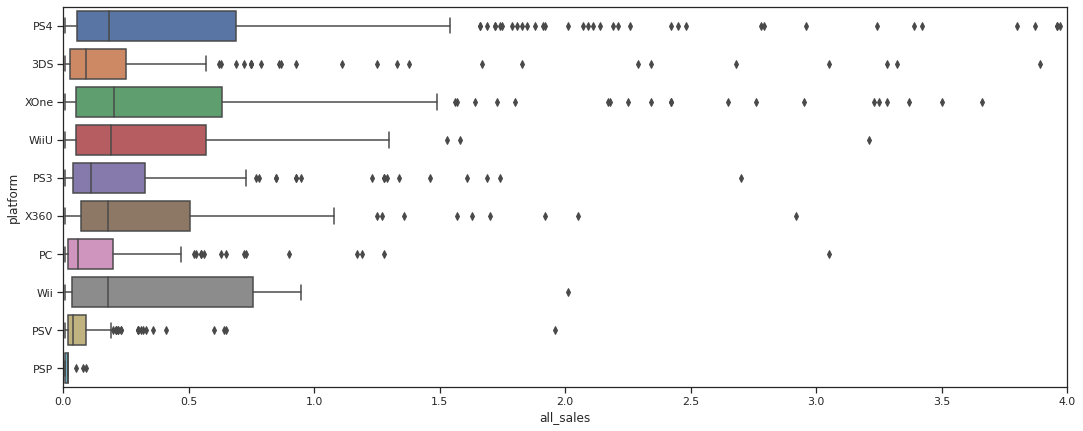

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=games_new, x="all_sales", 
            y="platform", palette="deep"
         )
plt.xlim(0, 4)
plt.show()

По средним продажам, за весь актуальный период, лидирует XOne, в аутсайдерах PSV, PSP. Однако, судя по выбросам, PS4 имеет на свой платформе самые успешные игры, продажи более 12 млн. В то время как XOne может похвастаться только продажами порядка 6 млн.

### Влияние отзывов на продажи *

Как мы определили ранее, самые успешные, по количеству продаж, игры были у платформы PS3. Оценим влияние пользователей и критиков на продажи

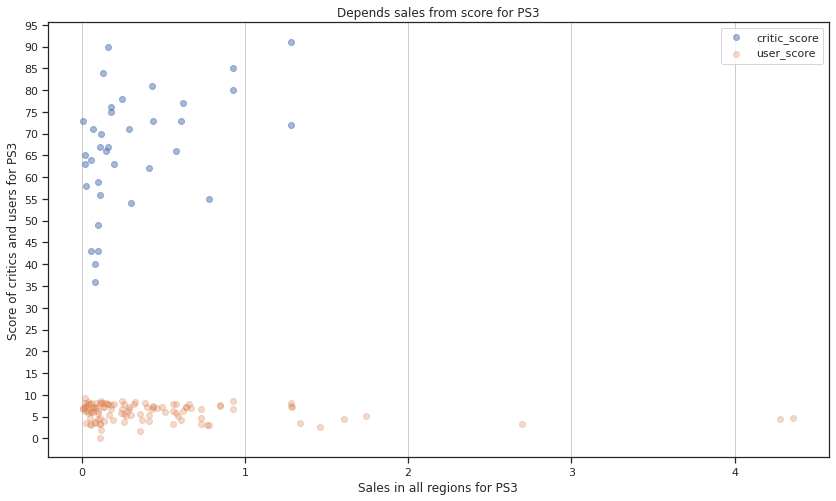

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(data=games_new.query("platform == 'PS3'"), x="all_sales", 
              y="critic_score", alpha=.5)
ax.scatter(data=games_new.query("platform == 'PS3'"), x="all_sales", 
              y="user_score", alpha=.3)
plt.xlabel("Sales in all regions for PS3")
plt.ylabel("Score of critics and users for PS3")
plt.title("Depends sales from score for PS3")
plt.grid(True, axis="x")
plt.yticks(range(0, 100, 5))
ax.legend(loc=0)
plt.show()

Оценки критиков имеют большее распределение в отличие от оценок пользователей, что объясняется достаточно просто. Для критиков, оценка чего бы то ни было, является работой, в отличие от пользователей, которые обращаются к отзывам и оценкам только в случае негативного опыта. Поэтому полагаться на оценки пользователей не стоит. Обратим внимание на распределение оценок критиков в зависимости от продаж.

Основная часть отзывов сосредоточена в промежутке от 0 до 1 млн проданных копий для всего диапазона оценок критиков (от 35 до 90). Продажи от 1 млн обладают малым количеством значений и их диапазон от 72 до 94. Можно предположить по возрастанию значений, что присутствует слабая зависимость между оценками критиков и продажами. Ранее мы строили корреляционный график, где продажи по регионам имели слабую корреляцию с оценками критиков. Теперь оценим корреляцию по единому столбцу продаж для оценок критиков для соотнесения выводов 

all_sales       1.000000
critic_score    0.327775
user_score     -0.001057
Name: all_sales, dtype: float64


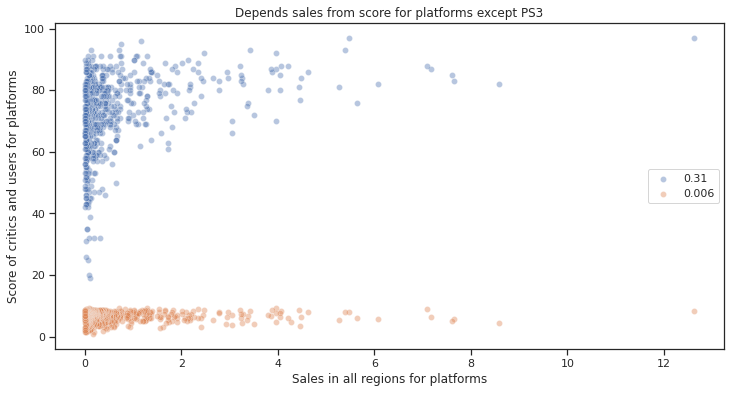

In [ ]:
print(games_new.loc[games.platform != 'PS3', 
                    ["all_sales","critic_score", "user_score"]]\
      .corr()["all_sales"])
plt.figure(figsize=(12,6))
sns.scatterplot(data=games_new.query("platform != 'PS3'"), x="all_sales", 
                y="critic_score", alpha=.4, label="0.31")
sns.scatterplot(data=games_new.query("platform != 'PS3'"), x="all_sales", 
                y="user_score", alpha=.4, label="0.006")
plt.xlabel("Sales in all regions for platforms")
plt.ylabel("Score of critics and users for platforms")
plt.title("Depends sales from score for platforms except PS3")
plt.show()

Как и ожидалось, выводы по одной из платформ соотносятся с выводами по всем платформам. Распределение оценок критиков и пользователей похоже. Рассчитанная корреляция соответствует предположенным уровням: 0,33 для предположенной слабой корреляции оценок критиков и проданных копий, -0.001 для отсутствия корреляции оценок пользователей и проданных копий.

### Распределение по жанрам *

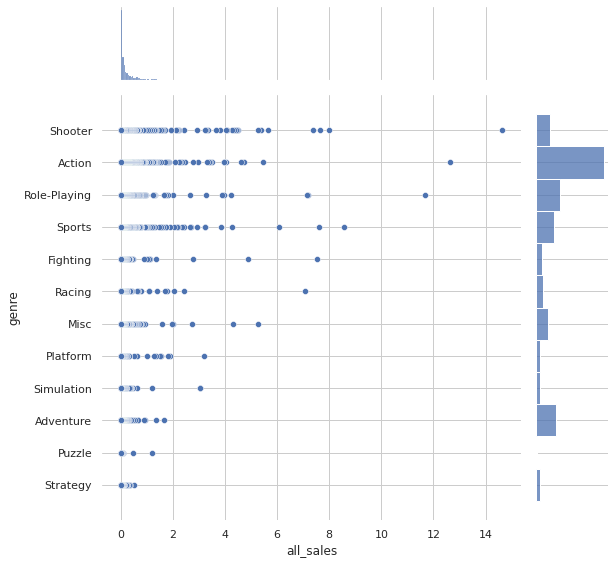

In [ ]:
sns.set_theme(style="whitegrid")
sns.jointplot(data=games_new, x="all_sales", y="genre", height=8)
plt.ylabel("")
plt.xlabel("Dependence of sales on the genre")
sns.despine(left=True, bottom=True)
plt.show()

Как и за весь период времени, так и за актуальный период, жанр Action остается одним из самых популярным. Количество игр в этом жанре так же превалирует над другими. Жанр Shooter может быть интересным: он находится на первом месте по продажам(некоторые игры были распроданы более чем 6 млн тиражом) и на 5 месте по количеству выпущенных игр. По аналогии с жанром Shooter стоит присмотреться к жанру Racing: небольшое количество выпущенных игр - 7 место и проданных копий более 2 млн. Жанр Sports интересен продажами более 4 млн, но низким количеством выпущенных игр (4 место) по сравнению с лидирующим жанром Action. Наиболее бесперспективным является жанр Adventure: довольно большое количество выпущенных игр (на 3-м месте) вкупе с продажами менее 2 млн.


### Вывод

Индустрия видеоигр достигла своего пика в 2008-2009 годах, когда было выпущено наибольшее количество игр. Далее произошел спад, связанный с мировым экономическим кризисом, и выпуск игр снизился. 

Наиболее успешными платформами за весь период времени были Wii, DS и PS2. В свои лучшие годы эти платформы выпускали огромное количество игр, что говорит о высокой популярности их среди игроков. 

На момент 2016 года на рынке осталось всего 9 платформ из 31 существовавших. Это указывает на то, что индустрия видеоигр постепенно консолидируется, а конкуренция между платформами становится все более жесткой. При этом DS, хотя и являлась одной из самых успешных платформ за все время, на момент 2016 года уже не было на рынке.

Потенциально прибильными в 2017 году могут быть две платформы: PS4 и 3DS. Тем не менее, PS4 имеет нисходящий тренд, тогда как 3DS является стабильной платформой. 

Платформа X360 лидирует по средним продажам, а PS3 продает игры миллионными копиями при меньших средних продажах. Это может объясняться тем, что на PS3 выходили более популярные и ожидаемые эксклюзивы.

Отзывы пользователей не имеют существенного влияния на продажи игр, в то время как отзывы критиков, хотя и имеют влияние, но довольно слабое. Это может говорить о том, что отзывы критиков могут служить важным индикатором качества игры, но все же решение о покупке принимается в основном на основе других факторов, таких как жанр, платформа.

Наиболее популярными жанрами являются Action, Shooter и RPG. Это может указывать на то, что игроки предпочитают динамичные и насыщенные по сюжету игры, которые предоставляют возможность исследования большого игрового мира и интересных персонажей.  

## 5 Портрет пользователя

Определите для пользователя каждого региона (NA, EU, JP):
  * определение самых популярные платформы (топ-5) и анализ различия в долях продаж;
  * определение и анализ самых популярных жанров (топ-5); 
  * определение влияния рейтинга ESRB на продажи в отдельном регионе.

Напишем функцию, которая отсортирует датафрейм необходимым образом и построит соответствующие графики

In [ ]:
def top_5(data, col):
  top = data.pivot_table(index=col, 
                            values=["NA_sales", "EU_sales", "JP_sales"], aggfunc="sum")
  fig = make_subplots(rows=1, cols=3, 
                    specs=[[{"type":"domain"}, {"type":"domain"}, 
                            {"type":"domain"}]], 
                    subplot_titles = ["Europe", "Japan", "North America"])
  for i, j in enumerate(top):
    df = top.sort_values(j, ascending = False)\
    .reset_index()
    df.loc[df.index > 4, col] = 'other'
    # px.pie(df, values=j, names=df["genre"])
    fig.add_trace(
        go.Pie(values=df[j], labels=df[col], textinfo="label+percent",
              insidetextorientation='radial', pull=[0, 0, 0, 0, 0, .1]), 
              row=1, col=i+1
        )
    fig.update(layout_showlegend=False)
  fig.show()
  

### Топ-5 популярных жанров

In [ ]:
top_5(games_new, "genre")

Количественной распределение жанров во всех регионах примерно одинаково. Жанры, не входящие в пятерку занимают около 30% рынка в среднем. В каждом регионе присутствует свой очевидно лидирующий жанр, занимающий около четверти рынка. Рынки Европы и Северной Америки совпадают по двум лидирующим жанрам. В общем, рынок Северной Америки имеет больше общих жанров с Японий, чем с Европой. Тем не менее во всех трех регионах популярен жанр Platform.

### Топ-5 популярных платформ

In [ ]:
top_5(games_new, "platform")

В Северной Америкие и Европе примерно одинаковое распределение рынка между платформами. Ведущие платформы занимают по 22,4% и 24,2% соответственно. В то время как в Японии почти половину рынка занимает платформа 3DS. На втором месте WiiU - 20,9%, которая представлена во всех регионах, как и PS4

### Влияние рейтинга на продажи

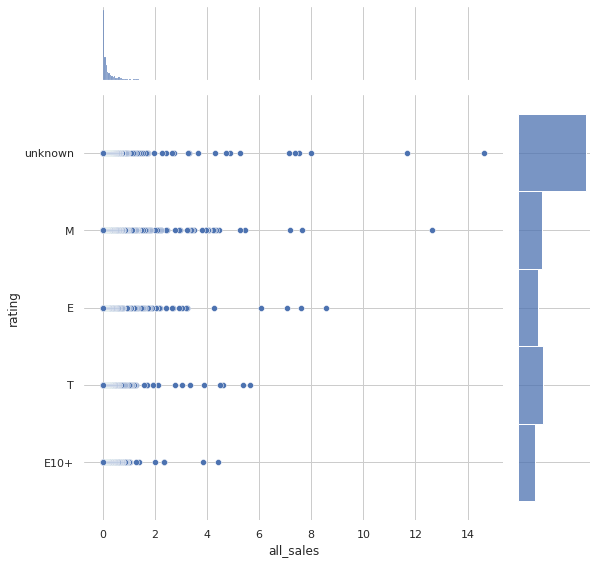

In [ ]:
sns.jointplot(data=games_new, x="all_sales", 
              y="rating", height=8)
plt.ylabel("")
plt.xlabel("Dependence of sales on the rating")
sns.despine(left=True, bottom=True)
plt.show()

«E» («Everyone») — «Для всех»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»




Игры с грубым юмором и сценами насилия для лиц стареш 17(рейтинг M) - наиболее распространенные и продающиеся игрыт. Продажи некоторых из них достигли отметки более 6 млн. Рейтинг Е имеет менее количество игр на своем счету и чуть меньшими продажами.

Игры для подростков с рейтингом T, так же часто, как игры с рейтингом M,но продажи этих игр не достигают и 6 млн. Игры с рейтингом E10+ представляют собой самую непопулярную категорию.

Основные значения продаж принадлежат неопределенному рейтингу, будет полезно рассмотреть данный рейтинг в разрезе регионов

In [ ]:
top_5(games_new, "rating")

Во всех трех регионах одни и те же лидирующие рейтинги. Распределение жанров для Европы и Северной Америки совпадает с общим распрделением. Тем не менее, неопределенный жанры занимает треть рынка игр Японии, что еще раз говорит о том, что организация, определяющая рейтинг не работает с этим рынком.

### Вывод

Чтобы занять рынок Японии, необходима игра, выпущенная на платформе 3DS в жанре Role-Playing, рейтинг игры потребуется определить дополнительно. Чтобы заинтересовать жителей всех регионов стоит сосредоточиться на жанре Platform на платформе WiiU или PS4, рейтинг M/E (для рынков Европы и Северной Америки). Если ориентироваться исключительно на рынок Северной Америки и Европы, то необходимо выбирать жанр Shooter на платформе X360

## 6 Проверка гипотез

  * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез используем t-тест для двух независимых выборок. Тест выполняется для гипотезы, сформулированной как равенсто. Необходимы условия для выполнения теста: генеральные совокупности не должны зависеть друг от друга, выборочные средние должны быть нормально распределены и дисперсии генеральных совокупностей должны быть равны. Так как в тесте мы будем использовать генеральные совокупности, то единственное условие, которое нужно учесть - равенство дисперсий. Генеральный совокупности независимы.

Нулевая гипотеза (Н0): средние пользовательские рейтинги платформ Xbox One и PC **равны**

Альтернативная гипотеза (Н1): средние пользовательские рейтинги платформ Xbox One и PC **не равны**

In [ ]:
h_xb = games_new.loc[games_new.platform == "XOne", "user_score"]
h_pc = games_new.loc[games_new.platform == "PC", "user_score"]
cond = np.var(h_xb) == np.var(h_pc)
st.ttest_ind(h_xb,
             h_pc, 
             equal_var=(np.var(h_xb)) == np.var(h_pc),
             nan_policy="omit"      
)


Ttest_indResult(statistic=1.5144565399252443, pvalue=0.13130164268728325)

При значение уровня статистической значимости 0.05, альтернативную гипотезу отвергнуть не удалось, потому что значение p-value равное 0,13 превышает уровень статистической значимости.

Вероятность случайно получить такое или большее различие равна почти 13%, хотя средние рейтинги для разных платформ не равны. Это говорит о том, что делать вывод о значимом различии между средними рейтингами мы не можем.

Нулевая гипотеза (Н0): средние пользовательские рейтинги жанров Action и Sports **равны**

Альтернативная гипотеза (Н1): средние пользовательские рейтинги жанров Action и Sports **не равны**

In [ ]:
h_xb = games_new.loc[games_new.genre == "Action", "user_score"]
h_pc = games_new.loc[games_new.genre == "Sports", "user_score"]
cond = np.var(h_xb) == np.var(h_pc)
st.ttest_ind(h_xb,
             h_pc, 
             equal_var=(np.var(h_xb)) == np.var(h_pc),
             nan_policy="omit"      
)

Ttest_indResult(statistic=1.8464328066970508, pvalue=0.06494515781660437)

При значение уровня статистической значимости 0.05, альтернативную гипотезу отвергнуть не удалось, потому что значение p-value равное 0,06 превышает уровень статистической значимости.

Вероятность случайно получить такое или большее различие равна почти 6%, хотя средние рейтинги для разных жанров не равны. Это говорит о том, что делать вывод о значимом различии между средними рейтингами мы не можем.

### Вывод

Проверка гиоптез показала, что значимого различия между средними оценками пользователей XOne и PC не обнаружен. То же самое можно сказать и об игроках, предпочитающих жанры Action и Sports.

## 7 Заключение

Для всего датасета была проделана работа по очистке и подготовке данных к исследовательскому анализу. Была проведена работа с дубликатами, пропущенными значениями, неверными форматами данных для каждого столбца. Большинство пропущенных значений пришлось оставить: заполнение привело бы к искажению, а удаление - к потере основной части данных. 

В ходе исследовательского анализа данных за 1980-2016 года выявился пиковый период для индустрии игр, который приходится на 2008-2009 года. Среди платформ, за весь период существования игровой индустрии, самые успешные по количеству проданных копий, были Wii, PS2 и DS. Для прогнозирования успешных платформ в 2017 был взят временной промежуток с 2014 года. Потенциально прибыльными платформами для выпуска игр оказались PS4 и 3DS. Лидеры рынка за 2014-2016 года платформы XOne и PS4. Если говорить об отзывах пользователей, то значительного влияния на уровень продаж они не окажут. Отзывы критиков могут послужить ориентиром для оценки контента игры, но не более того, потому как они оказывают довольно малое влияние на продажи. В то время как выбранный жанр окажет большое влияние на продажи, наравне с выбором платформы. Итак, для 2017 идельным сочетанием будет игра на платформе PS4 или 3DS в жанре Action, Shooter или Racing.

На основе анализа по регионам лидирющий жанр для рынков Европы и Северной Америки - Shooter, наряду с платформой PS4. Для рынка Японии более характерен жанр RPG и, занимащая почти половину рынка, платформа 3DS. При формировании концепции игры для Европы и Америки стоит так же обратить внимание на рейтинг. Рынок игр с рейтингом M представлен большим количеством игр, что гарантированно дает продажи в рамках 4 млн. Игры с рейтингом Е дадут меньшие продажи, около 3.8 млн, но конкуренция здесь куда ниже.

Рекламную компанию стоит проводить для платформ 3DS и PS4, ограничиваясь рамками жанров Action и RPG, что позволит охватить рынки всех регионов. Относительно рейтинга необходимо уточнение для рынка Японии. Для рынков Европы и Северной Америки ориентироваться на рейтинг М.